In [1]:
# ! pip install wordcloud -q
# ! pip install nltk -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import pipeline
from Sentiment_analysis import Sentiment

sentiment = Sentiment()

Device set to use mps:0


In [3]:
df = pd.read_csv('files/detik_semua_artikel.csv')
df.head()

,judul,isi,hari,tanggal,jam,kategori,link
0,Sulitnya Hapus Data Registrasi Aplikasi Dana,Saya ingin medaftar akun Dana (PT Espay Debit ...,Jumat,23 Mei 2025,15:32 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7928775...
1,Penawaran investasi PT Rifan Berjangka Tak Ses...,Saya adalah nasabah komoditas berjangka dari P...,Jumat,23 Mei 2025,15:15 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7928735...
2,"Dilindungi Asuransi, Dua Bulan Lebih Perbaikan...","Pada Oktober 2024, saya membeli mobil Ioniq 5 ...",Jumat,23 Mei 2025,14:33 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7928621...
3,Satu Tahun Menunggu Proses Refund Dana Member ...,Kami merupakan salah satu Mitra Member Loket P...,Jumat,16 Mei 2025,11:41 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7916830...
4,"Diklaim Lebih Kuat dari Kaca dan Acrylic, Sola...",Saya membeli Solartuff dari Impact Pratama Gro...,Selasa,13 Mei 2025,22:57 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7912935...


In [4]:
df['sentiment'] = df['judul'].apply(lambda text: sentiment.getSentimentLabel(text[:512]))
df.head()

,judul,isi,hari,tanggal,jam,kategori,link,sentiment
0,Sulitnya Hapus Data Registrasi Aplikasi Dana,Saya ingin medaftar akun Dana (PT Espay Debit ...,Jumat,23 Mei 2025,15:32 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7928775...,negative
1,Penawaran investasi PT Rifan Berjangka Tak Ses...,Saya adalah nasabah komoditas berjangka dari P...,Jumat,23 Mei 2025,15:15 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7928735...,negative
2,"Dilindungi Asuransi, Dua Bulan Lebih Perbaikan...","Pada Oktober 2024, saya membeli mobil Ioniq 5 ...",Jumat,23 Mei 2025,14:33 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7928621...,negative
3,Satu Tahun Menunggu Proses Refund Dana Member ...,Kami merupakan salah satu Mitra Member Loket P...,Jumat,16 Mei 2025,11:41 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7916830...,neutral
4,"Diklaim Lebih Kuat dari Kaca dan Acrylic, Sola...",Saya membeli Solartuff dari Impact Pratama Gro...,Selasa,13 Mei 2025,22:57 WIB,detikNewsSuara Pembaca,https://news.detik.com/suara-pembaca/d-7912935...,positive


In [5]:
df.sentiment.value_counts().sort_index()

sentiment
negative    250
neutral     734
positive     16
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='sentiment'>

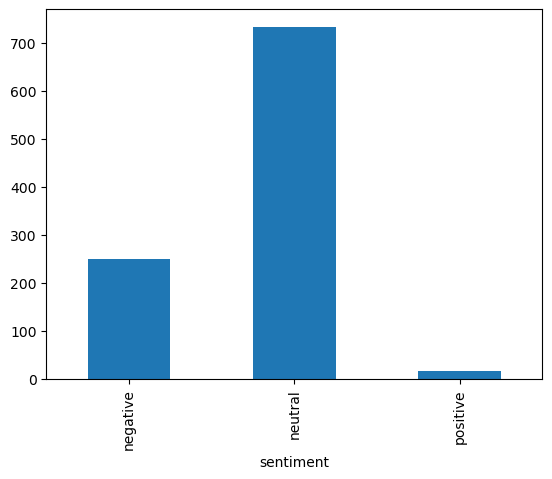

In [6]:
df.sentiment.value_counts().sort_index().plot(kind='bar')

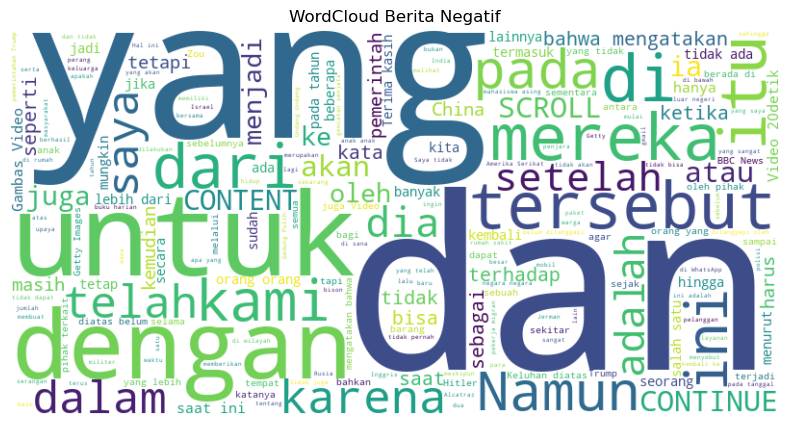

In [7]:


negatif_text = " ".join(df[df['sentiment'] == 'negative']['isi'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negatif_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Berita Negatif")
plt.show()

Advanced Visualization

In [8]:
# Atur Warna
sentiment_colors = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}

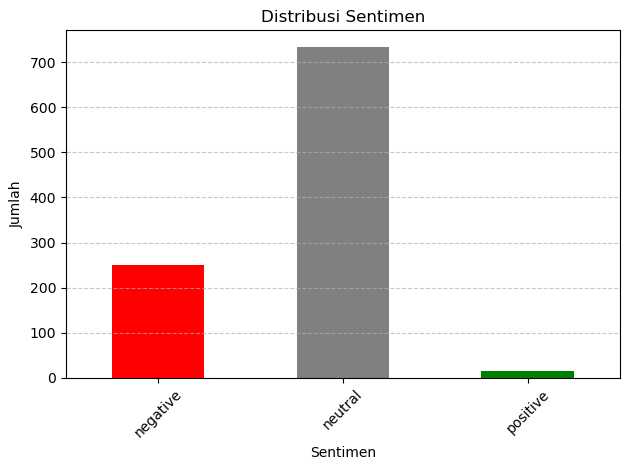

In [9]:
# === Distribusi Sentimen - Bar Chart ===
counts = df['sentiment'].value_counts().sort_index()
colors_bar = [sentiment_colors[sentiment] for sentiment in counts.index]

counts.plot(kind='bar', color=colors_bar)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

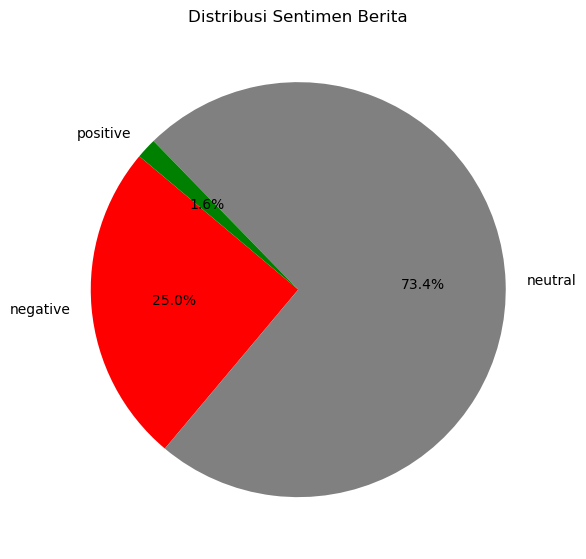

In [10]:
# === Distribusi Sentimen - Pie Chart ===
plt.figure(figsize=(6, 6))
colors_pie = [sentiment_colors[sentiment] for sentiment in counts.index]
counts.plot.pie(autopct='%1.1f%%', colors=colors_pie, startangle=140)
plt.title("Distribusi Sentimen Berita")
plt.ylabel("")
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Calvin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


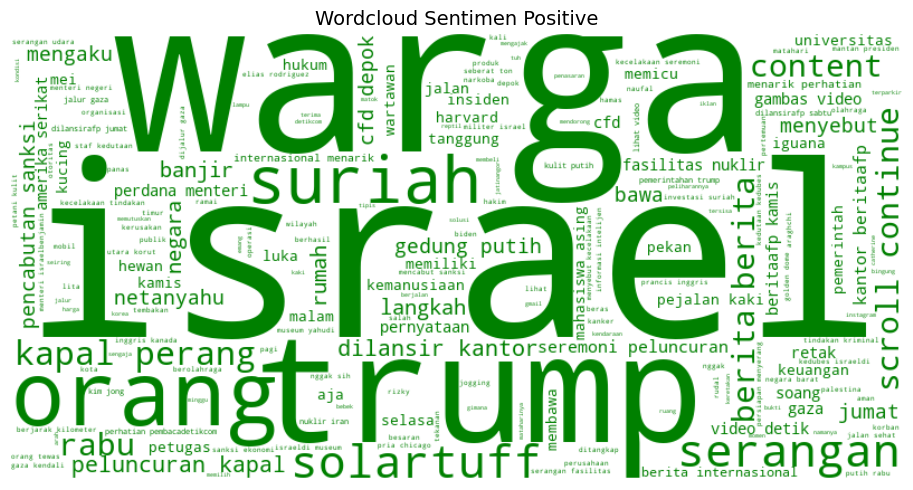

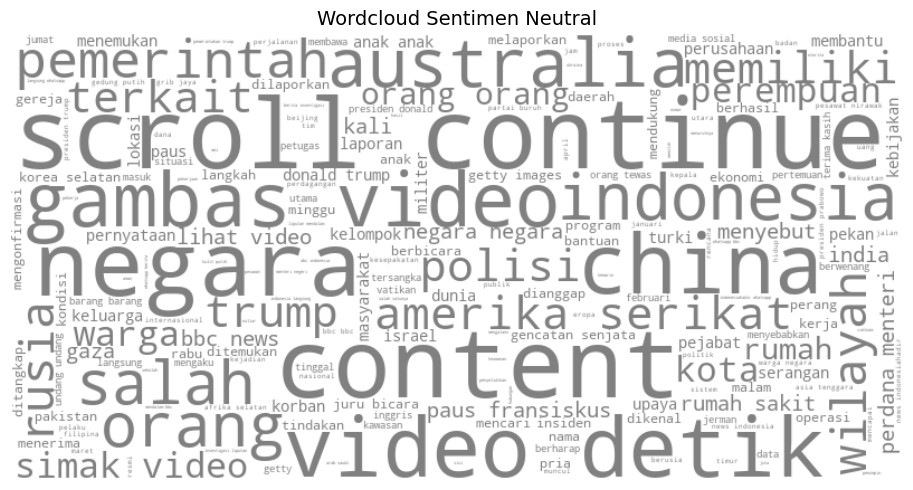

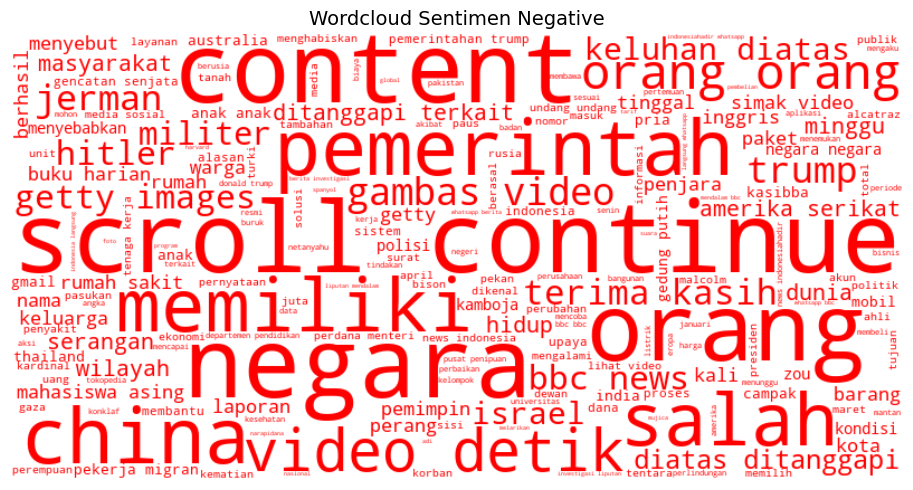

In [11]:
import re, nltk
from nltk.corpus import stopwords

# Download stopwords Indo (sekali saja)
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# === WordCloud untuk Setiap Sentimen ===

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Hapus karakter selain huruf & spasi
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return tokens

def generate_wordcloud(sentiment):
    texts = df[df['sentiment'] == sentiment]['isi'].dropna()
    all_tokens = []
    for t in texts:
        all_tokens.extend(preprocess(t))
    all_text = ' '.join(all_tokens)

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=None, color_func=lambda *args, **kwargs: sentiment_colors[sentiment]).generate(all_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud Sentimen {sentiment.capitalize()}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Buat WordCloud untuk masing-masing sentimen
for sent in ['positive', 'neutral', 'negative']:
    generate_wordcloud(sent)
